# Install Pyspark

In [1]:
! pip install pyspark

# Start the session

In [2]:
from pyspark.sql import SparkSession

# Initialize a Spark session
spark = SparkSession.builder \
    .appName("DataAnalysis") \
    .getOrCreate()

# Read the Data Frame

In [3]:
df = spark.read.csv(r"C:\Users\mk744\Downloads\Pokket_xo_22_to_27.csv", header = True, inferSchema = True)
df.show()

+--------------------+-------------+--------------------+--------------+-------+-------+--------+---------------+-------+-----------+---------+--------------+---------------+--------------------+----------+----------+---------+------+----+----+----+----+----+----+----+--------------------+--------+
|            actionId|      afprice|             browser|          city|comment|country|currency|           date| device|       goal|goalValue|holdDateExpire|             ip|         offer_title|        os|   revenue|   status|  sub1|sub2|sub3|sub4|sub5|sub6|sub7|sub8|                  ua|expanded|
+--------------------+-------------+--------------------+--------------+-------+-------+--------+---------------+-------+-----------+---------+--------------+---------------+--------------------+----------+----------+---------+------+----+----+----+----+----+----+----+--------------------+--------+
|24062633UABHHB_19...|undefined SGD|          Chrome 126|     Singapore|      -|     SG|     SGD|6/2

In [4]:
Select_Relevent_Cols = df.select(
                                   'actionId', 'country', 
                                   'currency', 'date', 
                                   'offer_title', 'revenue',
                                   'status', 'sub1'
                                   )
Select_Relevent_Cols.show()

+--------------------+-------+--------+---------------+--------------------+----------+---------+------+
|            actionId|country|currency|           date|         offer_title|   revenue|   status|  sub1|
+--------------------+-------+--------+---------------+--------------------+----------+---------+------+
|24062633UABHHB_19...|     SG|     SGD|6/27/2024 13:40|     Shopee SG - CPS|0.0319 SGD|confirmed|  tabm|
|24062633UABHHA_67...|     SG|     SGD|6/27/2024 13:40|     Shopee SG - CPS| 0.437 SGD|confirmed|  tabm|
|24062633UABHHB_19...|     SG|     SGD|6/27/2024 13:40|     Shopee SG - CPS|0.0319 SGD|confirmed|  tabm|
|24062611V345RR_13...|     SG|     SGD|6/27/2024 13:40|     Shopee SG - CPS|0.0994 SGD|confirmed|  tabm|
|2406262JVQQTQ2_17...|     ID|     IDR|6/27/2024 10:32|Shopee Indonesia ...|  67.5 IDR|confirmed|  tabm|
|2406261WRMPC3C_28...|     TH|     THB|6/27/2024 10:31|     Shopee TH - CPS|   4.6 THB|confirmed|    np|
|2406262EE4C3FE_12...|     TH|     THB|6/27/2024 10:31|

In [5]:

from pyspark.sql.functions import regexp_extract, col
Select_Relevent_Cols = Select_Relevent_Cols.withColumn("Payout", regexp_extract(col("revenue"), r'([0-9.]+)', 1))
# Extract string value (currency)
# Select_Relevent_Cols = Select_Relevent_Cols.withColumn("Currency", regexp_extract(col("revenue"), r'([A-Za-z]+)', 1))
Select_Relevent_Cols.show(truncate=False)


+----------------------------+-------+--------+---------------+----------------------+----------+---------+------+------+
|actionId                    |country|currency|date           |offer_title           |revenue   |status   |sub1  |Payout|
+----------------------------+-------+--------+---------------+----------------------+----------+---------+------+------+
|24062633UABHHB_19177228382_2|SG     |SGD     |6/27/2024 13:40|Shopee SG - CPS       |0.0319 SGD|confirmed|tabm  |0.0319|
|24062633UABHHA_6709496434_1 |SG     |SGD     |6/27/2024 13:40|Shopee SG - CPS       |0.437 SGD |confirmed|tabm  |0.437 |
|24062633UABHHB_19177228382_1|SG     |SGD     |6/27/2024 13:40|Shopee SG - CPS       |0.0319 SGD|confirmed|tabm  |0.0319|
|24062611V345RR_13799024876_1|SG     |SGD     |6/27/2024 13:40|Shopee SG - CPS       |0.0994 SGD|confirmed|tabm  |0.0994|
|2406262JVQQTQ2_17292196823_1|ID     |IDR     |6/27/2024 10:32|Shopee Indonesia - CPS|67.5 IDR  |confirmed|tabm  |67.5  |
|2406261WRMPC3C_28202075

In [6]:
from pyspark.sql.functions import split, col
Select_Relevent_Cols = Select_Relevent_Cols.withColumn("Date", split(col("date"), ' ')[0])
Select_Relevent_Cols = Select_Relevent_Cols.withColumn("Time", split(col("date"), ' ')[1])
Select_Relevent_Cols.show(truncate=False)

+----------------------------+-------+--------+---------+----------------------+----------+---------+------+------+----+
|actionId                    |country|currency|Date     |offer_title           |revenue   |status   |sub1  |Payout|Time|
+----------------------------+-------+--------+---------+----------------------+----------+---------+------+------+----+
|24062633UABHHB_19177228382_2|SG     |SGD     |6/27/2024|Shopee SG - CPS       |0.0319 SGD|confirmed|tabm  |0.0319|NULL|
|24062633UABHHA_6709496434_1 |SG     |SGD     |6/27/2024|Shopee SG - CPS       |0.437 SGD |confirmed|tabm  |0.437 |NULL|
|24062633UABHHB_19177228382_1|SG     |SGD     |6/27/2024|Shopee SG - CPS       |0.0319 SGD|confirmed|tabm  |0.0319|NULL|
|24062611V345RR_13799024876_1|SG     |SGD     |6/27/2024|Shopee SG - CPS       |0.0994 SGD|confirmed|tabm  |0.0994|NULL|
|2406262JVQQTQ2_17292196823_1|ID     |IDR     |6/27/2024|Shopee Indonesia - CPS|67.5 IDR  |confirmed|tabm  |67.5  |NULL|
|2406261WRMPC3C_28202075931_1|TH

In [7]:
# Drop the date and revenue columns
Select_Relevent_Cols.drop("date", "revenue", "Time").show()


+--------------------+-------+--------+--------------------+---------+------+------+
|            actionId|country|currency|         offer_title|   status|  sub1|Payout|
+--------------------+-------+--------+--------------------+---------+------+------+
|24062633UABHHB_19...|     SG|     SGD|     Shopee SG - CPS|confirmed|  tabm|0.0319|
|24062633UABHHA_67...|     SG|     SGD|     Shopee SG - CPS|confirmed|  tabm| 0.437|
|24062633UABHHB_19...|     SG|     SGD|     Shopee SG - CPS|confirmed|  tabm|0.0319|
|24062611V345RR_13...|     SG|     SGD|     Shopee SG - CPS|confirmed|  tabm|0.0994|
|2406262JVQQTQ2_17...|     ID|     IDR|Shopee Indonesia ...|confirmed|  tabm|  67.5|
|2406261WRMPC3C_28...|     TH|     THB|     Shopee TH - CPS|confirmed|    np|   4.6|
|2406262EE4C3FE_12...|     TH|     THB|     Shopee TH - CPS|confirmed|  tabm| 2.208|
|    2029.6021.752399|     BE|     USD|Abebooks Global -...|confirmed|  tabm|0.1632|
|   12544.6021.728623|     PL|     USD|          Nexo - CPA|confi

In [8]:
Currency_Counts = Select_Relevent_Cols.groupBy("currency").count().show(truncate = False)
Currency_Counts

+--------+-----+
|currency|count|
+--------+-----+
|IDR     |9    |
|THB     |16   |
|USD     |38   |
|SGD     |37   |
+--------+-----+



# Currency Count on Graph

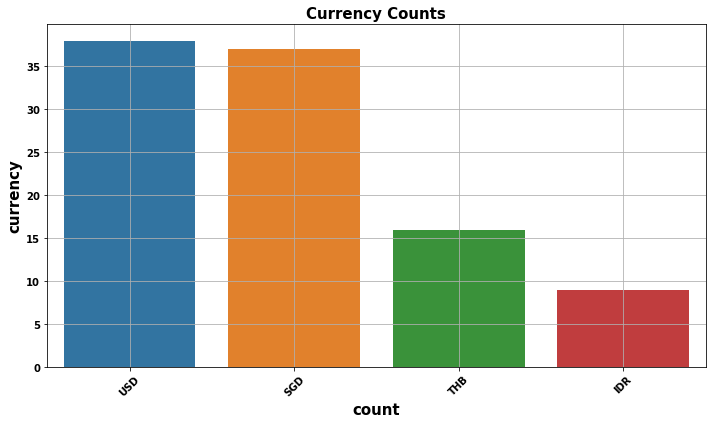

In [9]:
import pandas as pd
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
Currency_Counts_pd = df.toPandas()
plt.figure(figsize=(10, 6))
sns.countplot(data=Currency_Counts_pd, x='currency', order=Currency_Counts_pd['currency'].value_counts().index)
plt.title('Currency Counts', fontsize = 15, weight = 'bold')
plt.xticks(rotation=45, weight = 'bold')
plt.yticks(weight = 'bold')
plt.ylabel("currency", weight = "bold", fontsize = 15)
plt.xlabel("count", weight = "bold", fontsize = 15)
plt.grid(True)
plt.tight_layout()
plt.show()


In [39]:
grouped_df = Select_Relevent_Cols.groupBy('offer_title').count()
sorted_df = grouped_df.orderBy('offer_title')
sorted_df.show(truncate=False)

+----------------------+-----+
|offer_title           |count|
+----------------------+-----+
|Abebooks Global - CPS |1    |
|Boost Mobile - CPA    |1    |
|Nexo - CPA            |33   |
|Shopee Indonesia - CPS|9    |
|Shopee SG - CPS       |37   |
|Shopee TH - CPS       |16   |
|Shopify CPA           |3    |
+----------------------+-----+



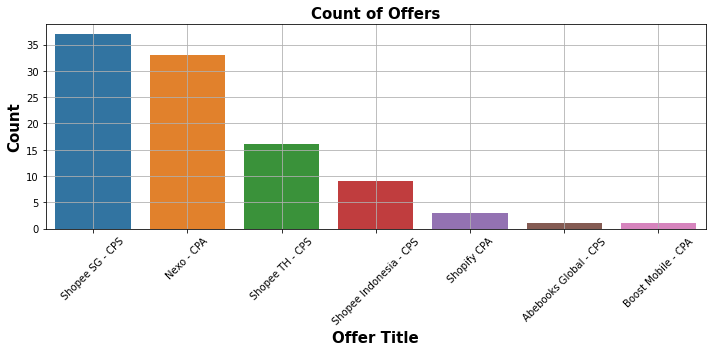

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
Campaign_count = df.toPandas()
plt.figure(figsize=(10, 5))
sns.countplot(data=Campaign_count, x='offer_title', order=Campaign_count['offer_title'].value_counts().index)
plt.title('Count of Offers', fontsize = 15, weight = 'bold')
plt.xlabel('Offer Title', fontsize = 15, weight = 'bold')
plt.ylabel('Count', fontsize = 15, weight = 'bold')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [10]:
data = spark.read.csv(r"C:\Users\mk744\Downloads\Affnet Media FS.csv", header=True, inferSchema=True)
data.show()

+--------------+--------------------+-------+------+----------+------+------------+---------+--------------------+--------+---+
| Stat.datetime|       Campaign_Name| Status|Amount|    Payout|Sub_Id|     Partner|Inventory|            Email_Id|Currency| ID|
+--------------+--------------------+-------+------+----------+------+------------+---------+--------------------+--------+---+
|6/24/2024 0:00|         Hulu CPS-US|pending|     0| 133.58672|   778|Affnet media|Flipshope|agoyal@flipshope.com|     INR|  0|
|6/24/2024 0:00|         Hulu CPS-US|pending|     0| 133.58672|   778|Affnet media|Flipshope|agoyal@flipshope.com|     INR|  0|
|6/24/2024 0:00|Neiman Marcus CPS...|pending|     0|       0.0|   739|Affnet media|Flipshope|agoyal@flipshope.com|     INR|  0|
|6/24/2024 0:00|Neiman Marcus CPS...|pending|     0|       0.0|   739|Affnet media|Flipshope|agoyal@flipshope.com|     INR|  0|
|6/24/2024 0:00|Neiman Marcus CPS...|pending|     0|391.743056|   739|Affnet media|Flipshope|agoyal@flip

# Print Schema

In [11]:
df.printSchema()

root
 |-- actionId: string (nullable = true)
 |-- afprice: string (nullable = true)
 |-- browser: string (nullable = true)
 |-- city: string (nullable = true)
 |-- comment: string (nullable = true)
 |-- country: string (nullable = true)
 |-- currency: string (nullable = true)
 |-- date: string (nullable = true)
 |-- device: string (nullable = true)
 |-- goal: string (nullable = true)
 |-- goalValue: integer (nullable = true)
 |-- holdDateExpire: string (nullable = true)
 |-- ip: string (nullable = true)
 |-- offer_title: string (nullable = true)
 |-- os: string (nullable = true)
 |-- revenue: string (nullable = true)
 |-- status: string (nullable = true)
 |-- sub1: string (nullable = true)
 |-- sub2: string (nullable = true)
 |-- sub3: string (nullable = true)
 |-- sub4: string (nullable = true)
 |-- sub5: string (nullable = true)
 |-- sub6: string (nullable = true)
 |-- sub7: string (nullable = true)
 |-- sub8: string (nullable = true)
 |-- ua: string (nullable = true)
 |-- expanded: 

In [12]:
data.printSchema()

root
 |-- Stat.datetime: string (nullable = true)
 |-- Campaign_Name: string (nullable = true)
 |-- Status: string (nullable = true)
 |-- Amount: integer (nullable = true)
 |-- Payout: double (nullable = true)
 |-- Sub_Id: integer (nullable = true)
 |-- Partner: string (nullable = true)
 |-- Inventory: string (nullable = true)
 |-- Email_Id: string (nullable = true)
 |-- Currency: string (nullable = true)
 |-- ID: integer (nullable = true)



In [13]:
Relevent_Cols = data.select(
                            "Campaign_Name", "Email_Id",
                            "Amount", "Payout", "Currency"
                           ).show()
Relevent_Cols

+--------------------+--------------------+------+----------+--------+
|       Campaign_Name|            Email_Id|Amount|    Payout|Currency|
+--------------------+--------------------+------+----------+--------+
|         Hulu CPS-US|agoyal@flipshope.com|     0| 133.58672|     INR|
|         Hulu CPS-US|agoyal@flipshope.com|     0| 133.58672|     INR|
|Neiman Marcus CPS...|agoyal@flipshope.com|     0|       0.0|     INR|
|Neiman Marcus CPS...|agoyal@flipshope.com|     0|       0.0|     INR|
|Neiman Marcus CPS...|agoyal@flipshope.com|     0|391.743056|     INR|
|   Sam's Club CPS-US|agoyal@flipshope.com|     0|       0.0|     INR|
|   Sam's Club CPS-US|agoyal@flipshope.com|     0|       0.0|     INR|
|   Sam's Club CPS-US|agoyal@flipshope.com|     0| 23.377676|     INR|
|   Sam's Club CPS-US|agoyal@flipshope.com|     0| 28.721145|     INR|
|   Sam's Club CPS-US|agoyal@flipshope.com|     0| 48.024426|     INR|
|         Hulu CPS-US|agoyal@flipshope.com|     0| 133.58672|     INR|
|   Sa

In [14]:
data_filter = data.filter(data["Payout"] > 100)
data_filter.show()

+--------------+--------------------+-------+------+----------+------+------------+---------+--------------------+--------+---+
| Stat.datetime|       Campaign_Name| Status|Amount|    Payout|Sub_Id|     Partner|Inventory|            Email_Id|Currency| ID|
+--------------+--------------------+-------+------+----------+------+------------+---------+--------------------+--------+---+
|6/24/2024 0:00|         Hulu CPS-US|pending|     0| 133.58672|   778|Affnet media|Flipshope|agoyal@flipshope.com|     INR|  0|
|6/24/2024 0:00|         Hulu CPS-US|pending|     0| 133.58672|   778|Affnet media|Flipshope|agoyal@flipshope.com|     INR|  0|
|6/24/2024 0:00|Neiman Marcus CPS...|pending|     0|391.743056|   739|Affnet media|Flipshope|agoyal@flipshope.com|     INR|  0|
|6/23/2024 0:00|         Hulu CPS-US|pending|     0| 133.58672|   778|Affnet media|Flipshope|agoyal@flipshope.com|     INR|  0|
|6/21/2024 0:00|         Hulu CPS-US|pending|     0| 133.58672|   778|Affnet media|Flipshope|agoyal@flip

In [15]:
data.filter(data['Payout'] >= 5).show()


+--------------+--------------------+-------+------+----------+------+------------+---------+--------------------+--------+---+
| Stat.datetime|       Campaign_Name| Status|Amount|    Payout|Sub_Id|     Partner|Inventory|            Email_Id|Currency| ID|
+--------------+--------------------+-------+------+----------+------+------------+---------+--------------------+--------+---+
|6/24/2024 0:00|         Hulu CPS-US|pending|     0| 133.58672|   778|Affnet media|Flipshope|agoyal@flipshope.com|     INR|  0|
|6/24/2024 0:00|         Hulu CPS-US|pending|     0| 133.58672|   778|Affnet media|Flipshope|agoyal@flipshope.com|     INR|  0|
|6/24/2024 0:00|Neiman Marcus CPS...|pending|     0|391.743056|   739|Affnet media|Flipshope|agoyal@flipshope.com|     INR|  0|
|6/24/2024 0:00|   Sam's Club CPS-US|pending|     0| 23.377676|   702|Affnet media|Flipshope|agoyal@flipshope.com|     INR|  0|
|6/24/2024 0:00|   Sam's Club CPS-US|pending|     0| 28.721145|   702|Affnet media|Flipshope|agoyal@flip

In [16]:
data.filter(data["Payout"] == 133.58672).show()

+--------------+-------------+-------+------+---------+------+------------+---------+--------------------+--------+---+
| Stat.datetime|Campaign_Name| Status|Amount|   Payout|Sub_Id|     Partner|Inventory|            Email_Id|Currency| ID|
+--------------+-------------+-------+------+---------+------+------------+---------+--------------------+--------+---+
|6/24/2024 0:00|  Hulu CPS-US|pending|     0|133.58672|   778|Affnet media|Flipshope|agoyal@flipshope.com|     INR|  0|
|6/24/2024 0:00|  Hulu CPS-US|pending|     0|133.58672|   778|Affnet media|Flipshope|agoyal@flipshope.com|     INR|  0|
|6/23/2024 0:00|  Hulu CPS-US|pending|     0|133.58672|   778|Affnet media|Flipshope|agoyal@flipshope.com|     INR|  0|
|6/21/2024 0:00|  Hulu CPS-US|pending|     0|133.58672|   778|Affnet media|Flipshope|agoyal@flipshope.com|     INR|  0|
|6/15/2024 0:00|  Hulu CPS-US|pending|     0|133.58672|   778|Affnet media|Flipshope|agoyal@flipshope.com|     INR|  0|
+--------------+-------------+-------+--

In [17]:
data.groupBy(data["Payout"]).count().show()

+----------+-----+
|    Payout|count|
+----------+-----+
|       0.0|   59|
| 28.721145|    1|
| 48.024426|    1|
|391.743056|    1|
| 18.568554|    1|
| 133.58672|    5|
| 22.709742|    1|
| 16.364373|    1|
|  9.284277|    1|
| 23.377676|    1|
| 54.703762|    1|
| 45.486278|    1|
+----------+-----+



In [18]:
data.groupBy(data['Campaign_Name']).count().show()

+--------------------+-----+
|       Campaign_Name|count|
+--------------------+-----+
|                NULL|    1|
|Neiman Marcus CPS...|    3|
|         Hulu CPS-US|    6|
|   Sam's Club CPS-US|   64|
+--------------------+-----+



In [19]:
data.groupBy(data['Payout']).mean().show()

+----------+-----------+-----------+-----------------+-------+
|    Payout|avg(Amount)|avg(Payout)|      avg(Sub_Id)|avg(ID)|
+----------+-----------+-----------+-----------------+-------+
|       0.0|        0.0|        0.0|704.5862068965517|    0.0|
| 28.721145|        0.0|  28.721145|            702.0|    0.0|
| 48.024426|        0.0|  48.024426|            702.0|    0.0|
|391.743056|        0.0| 391.743056|            739.0|    0.0|
| 18.568554|        0.0|  18.568554|            702.0|    0.0|
| 133.58672|        0.0|  133.58672|            778.0|    0.0|
| 22.709742|        0.0|  22.709742|            702.0|    0.0|
| 16.364373|        0.0|  16.364373|            702.0|    0.0|
|  9.284277|        0.0|   9.284277|            702.0|    0.0|
| 23.377676|        0.0|  23.377676|            702.0|    0.0|
| 54.703762|        0.0|  54.703762|            702.0|    0.0|
| 45.486278|        0.0|  45.486278|            702.0|    0.0|
+----------+-----------+-----------+-----------------+-

In [20]:
data.groupBy(data['Payout']).sum().show()

+----------+-----------+-----------------+-----------+-------+
|    Payout|sum(Amount)|      sum(Payout)|sum(Sub_Id)|sum(ID)|
+----------+-----------+-----------------+-----------+-------+
|       0.0|          0|              0.0|      40866|      0|
| 28.721145|          0|        28.721145|        702|      0|
| 48.024426|          0|        48.024426|        702|      0|
|391.743056|          0|       391.743056|        739|      0|
| 18.568554|          0|        18.568554|        702|      0|
| 133.58672|          0|667.9336000000001|       3890|      0|
| 22.709742|          0|        22.709742|        702|      0|
| 16.364373|          0|        16.364373|        702|      0|
|  9.284277|          0|         9.284277|        702|      0|
| 23.377676|          0|        23.377676|        702|      0|
| 54.703762|          0|        54.703762|        702|      0|
| 45.486278|          0|        45.486278|        702|      0|
+----------+-----------+-----------------+-----------+-

In [21]:
Rename_Cols = data.withColumnRenamed("Stat.datetime", "Date_Time")
Rename_Cols.show()

+--------------+--------------------+-------+------+----------+------+------------+---------+--------------------+--------+---+
|     Date_Time|       Campaign_Name| Status|Amount|    Payout|Sub_Id|     Partner|Inventory|            Email_Id|Currency| ID|
+--------------+--------------------+-------+------+----------+------+------------+---------+--------------------+--------+---+
|6/24/2024 0:00|         Hulu CPS-US|pending|     0| 133.58672|   778|Affnet media|Flipshope|agoyal@flipshope.com|     INR|  0|
|6/24/2024 0:00|         Hulu CPS-US|pending|     0| 133.58672|   778|Affnet media|Flipshope|agoyal@flipshope.com|     INR|  0|
|6/24/2024 0:00|Neiman Marcus CPS...|pending|     0|       0.0|   739|Affnet media|Flipshope|agoyal@flipshope.com|     INR|  0|
|6/24/2024 0:00|Neiman Marcus CPS...|pending|     0|       0.0|   739|Affnet media|Flipshope|agoyal@flipshope.com|     INR|  0|
|6/24/2024 0:00|Neiman Marcus CPS...|pending|     0|391.743056|   739|Affnet media|Flipshope|agoyal@flip

In [22]:
from pyspark.sql.functions import split, col
# Split the 'date_time' column into 'date' and 'time'
Rename_Cols = Rename_Cols.withColumn("Date", split(col("Date_Time"), ' ')[0])
Rename_Cols = Rename_Cols.withColumn("Time", split(col("Date_Time"), ' ')[1])

# Show the resulting DataFrame
Rename_Cols.show(truncate=False)


+--------------+---------------------+-------+------+----------+------+------------+---------+--------------------+--------+---+---------+----+
|Date_Time     |Campaign_Name        |Status |Amount|Payout    |Sub_Id|Partner     |Inventory|Email_Id            |Currency|ID |Date     |Time|
+--------------+---------------------+-------+------+----------+------+------------+---------+--------------------+--------+---+---------+----+
|6/24/2024 0:00|Hulu CPS-US          |pending|0     |133.58672 |778   |Affnet media|Flipshope|agoyal@flipshope.com|INR     |0  |6/24/2024|0:00|
|6/24/2024 0:00|Hulu CPS-US          |pending|0     |133.58672 |778   |Affnet media|Flipshope|agoyal@flipshope.com|INR     |0  |6/24/2024|0:00|
|6/24/2024 0:00|Neiman Marcus CPS- US|pending|0     |0.0       |739   |Affnet media|Flipshope|agoyal@flipshope.com|INR     |0  |6/24/2024|0:00|
|6/24/2024 0:00|Neiman Marcus CPS- US|pending|0     |0.0       |739   |Affnet media|Flipshope|agoyal@flipshope.com|INR     |0  |6/24/202

In [23]:
# Payout is between 40 and 50
filtered_df = Rename_Cols.filter((col("payout") >= 40) & (col("payout") <= 50))
filtered_df.show()


+--------------+-----------------+-------+------+---------+------+------------+---------+--------------------+--------+---+---------+----+
|     Date_Time|    Campaign_Name| Status|Amount|   Payout|Sub_Id|     Partner|Inventory|            Email_Id|Currency| ID|     Date|Time|
+--------------+-----------------+-------+------+---------+------+------------+---------+--------------------+--------+---+---------+----+
|6/24/2024 0:00|Sam's Club CPS-US|pending|     0|48.024426|   702|Affnet media|Flipshope|agoyal@flipshope.com|     INR|  0|6/24/2024|0:00|
|6/16/2024 0:00|Sam's Club CPS-US|pending|     0|45.486278|   702|Affnet media|Flipshope|agoyal@flipshope.com|     INR|  0|6/16/2024|0:00|
+--------------+-----------------+-------+------+---------+------+------------+---------+--------------------+--------+---+---------+----+



In [24]:
# Payout is between 50 and 100
filtered_df_1 = Rename_Cols.filter((col("Payout") >= 50 ) & (col("Payout") <= 100))
filtered_df_1.show()

+--------------+-----------------+-------+------+---------+------+------------+---------+--------------------+--------+---+---------+----+
|     Date_Time|    Campaign_Name| Status|Amount|   Payout|Sub_Id|     Partner|Inventory|            Email_Id|Currency| ID|     Date|Time|
+--------------+-----------------+-------+------+---------+------+------------+---------+--------------------+--------+---+---------+----+
|6/16/2024 0:00|Sam's Club CPS-US|pending|     0|54.703762|   702|Affnet media|Flipshope|agoyal@flipshope.com|     INR|  0|6/16/2024|0:00|
+--------------+-----------------+-------+------+---------+------+------------+---------+--------------------+--------+---+---------+----+



In [25]:
# Payout is between 100 and 150
filtered_df_2 = Rename_Cols.filter((col("Payout") >= 100) & (col("PAYOUT") <= 150))
filtered_df_2.show()

+--------------+-------------+-------+------+---------+------+------------+---------+--------------------+--------+---+---------+----+
|     Date_Time|Campaign_Name| Status|Amount|   Payout|Sub_Id|     Partner|Inventory|            Email_Id|Currency| ID|     Date|Time|
+--------------+-------------+-------+------+---------+------+------------+---------+--------------------+--------+---+---------+----+
|6/24/2024 0:00|  Hulu CPS-US|pending|     0|133.58672|   778|Affnet media|Flipshope|agoyal@flipshope.com|     INR|  0|6/24/2024|0:00|
|6/24/2024 0:00|  Hulu CPS-US|pending|     0|133.58672|   778|Affnet media|Flipshope|agoyal@flipshope.com|     INR|  0|6/24/2024|0:00|
|6/23/2024 0:00|  Hulu CPS-US|pending|     0|133.58672|   778|Affnet media|Flipshope|agoyal@flipshope.com|     INR|  0|6/23/2024|0:00|
|6/21/2024 0:00|  Hulu CPS-US|pending|     0|133.58672|   778|Affnet media|Flipshope|agoyal@flipshope.com|     INR|  0|6/21/2024|0:00|
|6/15/2024 0:00|  Hulu CPS-US|pending|     0|133.58672|

In [26]:
# Payout is between 150 and 500
filtered_df_3 = Rename_Cols.filter((col("Payout") >= 150) & (col("Payout") <= 500))
filtered_df_3.show()

+--------------+--------------------+-------+------+----------+------+------------+---------+--------------------+--------+---+---------+----+
|     Date_Time|       Campaign_Name| Status|Amount|    Payout|Sub_Id|     Partner|Inventory|            Email_Id|Currency| ID|     Date|Time|
+--------------+--------------------+-------+------+----------+------+------------+---------+--------------------+--------+---+---------+----+
|6/24/2024 0:00|Neiman Marcus CPS...|pending|     0|391.743056|   739|Affnet media|Flipshope|agoyal@flipshope.com|     INR|  0|6/24/2024|0:00|
+--------------+--------------------+-------+------+----------+------+------------+---------+--------------------+--------+---+---------+----+

